In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['FangSong']
mpl.rcParams['axes.unicode_minus']=False
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
import scipy.stats as st

In [3]:
x=0.95 #设定95%的置信水平
z=st.norm.ppf(q=1-x) #计算正太分布的分位数
x=np.linspace(-4,4,200) #创建从-4到4的等差数列（投资组合盈亏）
y=st.norm.pdf(x) #计算正太分布的概率密度函数值
x1=np.linspace(-4,z,100) #创建从-4到z的等差数列
y1=st.norm.pdf(x1)

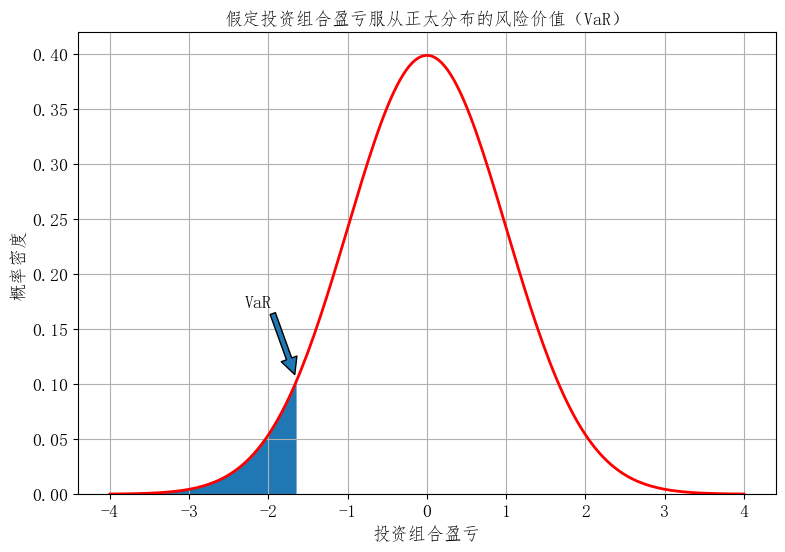

In [4]:
plt.figure(figsize=(9,6))
plt.plot(x,y,'r-',lw=2.0)
plt.fill_between(x1,y1) #颜色填充
plt.xlabel(u'投资组合盈亏',fontsize=13)
plt.ylabel(u'概率密度',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0,0.42)
plt.annotate('VaR',xy=(z-0.02,st.norm.pdf(z)+0.005),xytext=(-2.3,0.17),arrowprops=dict(shrink=0.01),fontsize=13)
plt.title(u'假定投资组合盈亏服从正太分布的风险价值（VaR）',fontsize=13)
plt.grid()
plt.show()

In [5]:
def VaR_VCM(Value,Rp,Vp,X,N):
    '''定义一个运用方差-协方差法计算风险价值的函数
    Value:代表投资组合的价值或市值
    Rp:代表投资组合平均收益率
    Vp:投资组合收益率的日波动率
    X:代表置信水平
    N:代表持有期，用天数表示'''
    import scipy.stats as st
    from numpy import sqrt
    z=abs(st.norm.ppf(q=1-X)) #计算标准正太分布下1-X的分位数并取绝对值
    VaR_1day=Value*(z*Vp-Rp) #计算持有期为1天的风险价值
    VaR_Nday=sqrt(N)*VaR_1day
    return VaR_Nday

In [6]:
price=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第15章/投资组合配置资产的每日价格（2018年至2020年）.xlsx',
                   sheet_name="Sheet1",header=0,index_col=0)

In [7]:
price=price.dropna() #删除缺失值

In [8]:
price.index=pd.DatetimeIndex(price.index)

In [9]:
price.iloc[0]

贵州茅台          703.8500
交通银行            6.2800
嘉实增强信用基金        1.0030
华夏恒生ETF         1.6089
博时标普500ETF      1.6277
Name: 2018-01-02 00:00:00, dtype: float64

<Axes: xlabel='日期'>

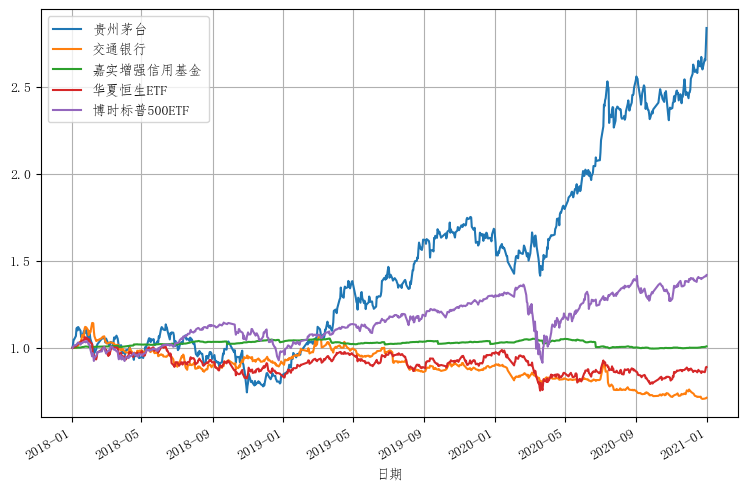

In [10]:
(price/price.iloc[0]).plot(figsize=(9,6),grid=True) #将首个交易日价格归一并且可视化

In [11]:
R=np.log(price/price.shift(1))
R=R.dropna()
R.describe()

,贵州茅台,交通银行,嘉实增强信用基金,华夏恒生ETF,博时标普500ETF
count,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.001482,-0.000480,0.000013,-0.000165,0.000497
std,0.020443,0.011458,0.002251,0.013269,0.015264
min,-0.105361,-0.078359,-0.027399,-0.059311,-0.127101
25%,-0.010090,-0.005227,0.000000,-0.006840,-0.004421
50%,0.000559,0.000000,0.000000,0.000320,0.001040
75%,0.013493,0.005000,0.000966,0.006937,0.007035
max,0.063483,0.073159,0.008675,0.057534,0.094474


In [12]:
R_mean=R.mean() #计算每个资产的日平均收益率
print('2018年至2020年期间日平均收益率\n',R_mean)

2018年至2020年期间日平均收益率
 贵州茅台          0.001482
交通银行         -0.000480
嘉实增强信用基金      0.000013
华夏恒生ETF      -0.000165
博时标普500ETF    0.000497
dtype: float64


In [13]:
R_vol=R.std()
print('2018年至2020年期间日波动率\n',R_vol)

2018年至2020年期间日波动率
 贵州茅台          0.020443
交通银行          0.011458
嘉实增强信用基金      0.002251
华夏恒生ETF       0.013269
博时标普500ETF    0.015264
dtype: float64


In [14]:
R_cov=R.cov() #计算每个资产收益率之间的协方差矩阵
R_cov

,贵州茅台,交通银行,嘉实增强信用基金,华夏恒生ETF,博时标普500ETF
贵州茅台,0.000418,0.000073,3.368571e-06,0.000138,5.683958e-05
交通银行,0.000073,0.000131,3.554074e-06,0.000073,2.501600e-05
嘉实增强信用基金,0.000003,0.000004,5.068715e-06,0.000002,-7.964083e-07
华夏恒生ETF,0.000138,0.000073,1.593791e-06,0.000176,6.619810e-05
博时标普500ETF,0.000057,0.000025,-7.964083e-07,0.000066,2.329852e-04


In [15]:
R_corr=R.corr() #计算每个资产收益率之间的相关系数矩阵
R_corr

,贵州茅台,交通银行,嘉实增强信用基金,华夏恒生ETF,博时标普500ETF
贵州茅台,1.000000,0.309601,0.073192,0.507300,0.182159
交通银行,0.309601,1.000000,0.137777,0.480258,0.143039
嘉实增强信用基金,0.073192,0.137777,1.000000,0.053353,-0.023175
华夏恒生ETF,0.507300,0.480258,0.053353,1.000000,0.326857
博时标普500ETF,0.182159,0.143039,-0.023175,0.326857,1.000000


In [16]:
W=np.array([0.15,0.20,0.50,0.05,0.10]) #投资组合中各资产配置的权重

In [17]:
Rp_daily=np.sum(W*R_mean)
print('2018年至2020年期间投资组合的日平均收益率',round(Rp_daily,6))

2018年至2020年期间投资组合的日平均收益率 0.000174


In [18]:
Vp_daily=np.sqrt(np.dot(W,np.dot(R_cov,W.T))) #计算投资组合日波动率
print('2018年至2020年期间投资组合的日波动率',round(Vp_daily,6))

2018年至2020年期间投资组合的日波动率 0.005581


In [19]:
value_port=1e10
D1=1
D2=10
X1=0.95
X2=0.99 #置信水平为99%

In [20]:
VaR95_1day_VCM=VaR_VCM(Value=value_port,Rp=Rp_daily,Vp=Vp_daily,X=X1,N=D1)
VaR99_1day_VCM=VaR_VCM(Value=value_port,Rp=Rp_daily,Vp=Vp_daily,X=X2,N=D1)
print('方差-协方差法计算持有期为1天、置信水平为95%的风险价值',round(VaR95_1day_VCM,2))
print('方差-协方差法计算持有期为1天、置信水平为99%的风险价值',round(VaR99_1day_VCM,2))

方差-协方差法计算持有期为1天、置信水平为95%的风险价值 90061974.21
方差-协方差法计算持有期为1天、置信水平为99%的风险价值 128097870.58


In [21]:
VaR95_10day_VCM=VaR_VCM(Value=value_port,Rp=Rp_daily,Vp=Vp_daily,X=X1,N=D2)
VaR99_10day_VCM=VaR_VCM(Value=value_port,Rp=Rp_daily,Vp=Vp_daily,X=X2,N=D2)
print('方差-协方差法计算持有期为10天、置信水平为95%的风险价值',round(VaR95_10day_VCM,2))
print('方差-协方差法计算持有期为10天、置信水平为99%的风险价值',round(VaR99_10day_VCM,2))

方差-协方差法计算持有期为10天、置信水平为95%的风险价值 284800969.09
方差-协方差法计算持有期为10天、置信水平为99%的风险价值 405081034.45


In [22]:
value_past=value_port*W #用投资组合最新市值和资产权重计算每个资产最新市值

In [23]:
value_past

array([1.5e+09, 2.0e+09, 5.0e+09, 5.0e+08, 1.0e+09])

In [24]:
profit_past=np.dot(R,value_past)

In [25]:
profit_past

array([ 3.55673490e+07,  5.02232328e+07,  9.64416264e+06,  4.32052549e+07,
        5.61208562e+07,  2.41127389e+07, -5.24667360e+06,  3.90272094e+07,
        8.29220646e+06, -2.56102861e+07,  3.74160087e+07,  4.07644869e+07,
        3.60539486e+07,  1.03960755e+08,  1.66759991e+06, -1.35714461e+07,
        3.68685539e+07, -1.28387721e+08, -6.60670347e+07,  6.16614309e+07,
        4.52479093e+06, -6.72929871e+07,  6.67961677e+06, -2.66811432e+07,
       -7.20091023e+07, -8.14624497e+07, -8.35838113e+07, -7.66309082e+06,
        5.47917191e+07,  3.91424576e+07,  9.44784881e+07,  3.14058569e+07,
        2.12335068e+07, -6.39187730e+07, -6.51060701e+07,  2.17015273e+07,
       -2.96596911e+07, -2.89691331e+07,  1.41712119e+07, -2.50808518e+07,
        4.06135555e+07,  4.33529001e+07, -4.31677364e+06, -3.73149732e+07,
        1.66604585e+07,  4.25062613e+07, -2.66965996e+07,  1.25175261e+07,
       -2.86929330e+06, -1.22788281e+07, -6.88574160e+07, -1.19638327e+08,
        5.86697616e+05, -

In [26]:
profit_past=pd.DataFrame(data=profit_past,index=R.index,columns=['投资组合的模拟收益']) #z转换为数据框

In [27]:
R.index

DatetimeIndex(['2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12',
               '2018-01-16', '2018-01-17',
               ...
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='日期', length=704, freq=None)

In [28]:
profit_past

,投资组合的模拟收益
日期,
2018-01-03,3.556735e+07
2018-01-04,5.022323e+07
2018-01-05,9.644163e+06
2018-01-08,4.320525e+07
2018-01-09,5.612086e+07
...,...
2020-12-24,-1.357697e+07
2020-12-28,4.843954e+07
2020-12-29,6.915370e+06


<Axes: xlabel='日期'>

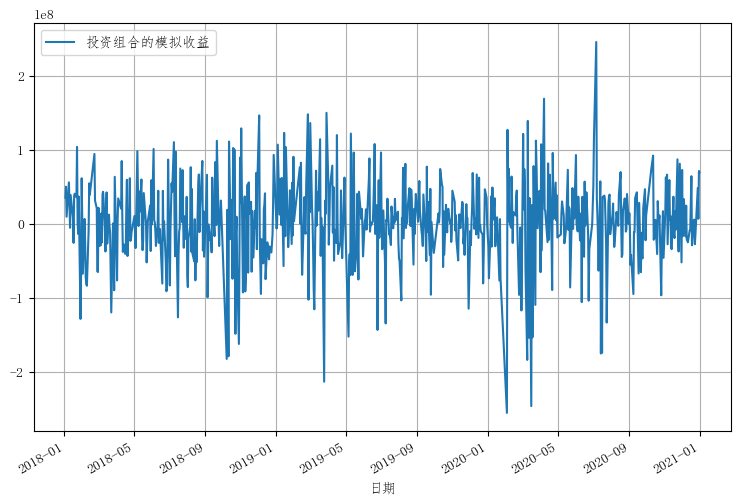

In [29]:
profit_past.plot(figsize=(9,6),grid=True)

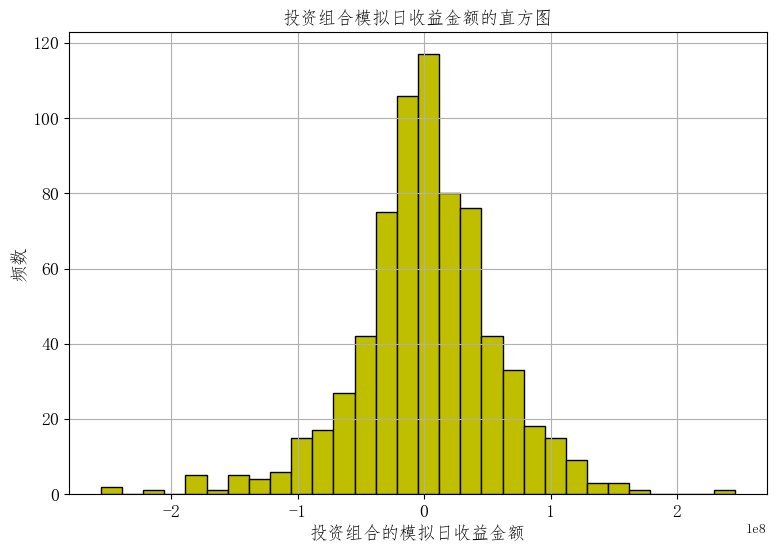

In [30]:
plt.figure(figsize=(9,6))
plt.hist(np.array(profit_past),bins=30,facecolor='y',edgecolor='k')
plt.xticks(fontsize=13)
plt.xlabel(u'投资组合的模拟日收益金额',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(u'频数',fontsize=13)
plt.title(u'投资组合模拟日收益金额的直方图',fontsize=13)
plt.grid()
plt.show()

In [31]:
st.kstest(rvs=profit_past['投资组合的模拟收益'],cdf='norm') #Kolmogorov_Smirnov检验

KstestResult(statistic=0.5213068181818181, pvalue=1.4935959618986873e-178, statistic_location=193010.70923524137, statistic_sign=-1)

In [32]:
st.anderson(x=profit_past['投资组合的模拟收益'],dist='norm')

AndersonResult(statistic=5.128400718185958, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1741415.705589979, scale=55812498.09430966)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [33]:
st.shapiro(profit_past['投资组合的模拟收益'])

ShapiroResult(statistic=0.9686519503593445, pvalue=3.921506869231095e-11)

In [34]:
st.normaltest(profit_past['投资组合的模拟收益'])

NormaltestResult(statistic=62.7633214481287, pvalue=2.3502708523936522e-14)

In [35]:
VaR95_1day_history=np.abs(profit_past.quantile(q=1-X1))
VaR99_1day_history=np.abs(profit_past.quantile(q=1-X2))
VaR95_1day_history=float(VaR95_1day_history)
VaR99_1day_history=float(VaR99_1day_history)
print('历史模拟法计算持有期为1天、置信水平为95%的风险价值',round(VaR95_1day_history,2))
print('历史模拟法计算持有期为1天、置信水平为99%的风险价值',round(VaR99_1day_history,2))

历史模拟法计算持有期为1天、置信水平为95%的风险价值 90962321.09
历史模拟法计算持有期为1天、置信水平为99%的风险价值 173899934.39


C:\Users\jay\AppData\Local\Temp\ipykernel_17364\3814391009.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  VaR95_1day_history=float(VaR95_1day_history)
C:\Users\jay\AppData\Local\Temp\ipykernel_17364\3814391009.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  VaR99_1day_history=float(VaR99_1day_history)


In [36]:
VaR95_10day_history=np.sqrt(D2)*VaR95_1day_history
VaR99_10day_history=np.sqrt(D2)*VaR99_1day_history
print('历史模拟法计算持有期为10天、置信水平为95%的风险价值',round(VaR95_10day_history,2))
print('历史模拟法计算持有期为10天、置信水平为99%的风险价值',round(VaR99_10day_history,2))

历史模拟法计算持有期为10天、置信水平为95%的风险价值 287648115.91
历史模拟法计算持有期为10天、置信水平为99%的风险价值 549919877.63


In [37]:
import numpy.random as npr

In [38]:
I=100000 #模拟的次数
n=8 #学生t分布的自由度
epsilon=npr.standard_t(df=n,size=I) #从学生t分布进行抽样

In [39]:
P1=price.iloc[-1,0] #投资组合中第1个资产（贵州茅台）最新收盘价
P2=price.iloc[-1,1]
P3=price.iloc[-1,2]
P4=price.iloc[-1,3]
P5=price.iloc[-1,-1]

In [40]:
R_mean=R.mean()*252 #每个资产的年化平均收益率
R_vol=R.std()*np.sqrt(252) #每个资产收益率的年化波动率
dt=1/252 #设定步长为一个交易日

In [41]:
P1_new=P1*np.exp((R_mean[0]-0.5*R_vol[0]**2)*dt+R_vol[0]*epsilon*np.sqrt(dt)) #模拟投资组合中第1个资产下一个交易日的收盘价
P2_new=P2*np.exp((R_mean[1]-0.5*R_vol[1]**2)*dt+R_vol[1]*epsilon*np.sqrt(dt)) #模拟投资组合中第1个资产下一个交易日的收盘价
P3_new=P3*np.exp((R_mean[2]-0.5*R_vol[2]**2)*dt+R_vol[2]*epsilon*np.sqrt(dt)) #模拟投资组合中第1个资产下一个交易日的收盘价
P4_new=P4*np.exp((R_mean[3]-0.5*R_vol[3]**2)*dt+R_vol[3]*epsilon*np.sqrt(dt)) #模拟投资组合中第1个资产下一个交易日的收盘价
P5_new=P5*np.exp((R_mean[-1]-0.5*R_vol[-1]**2)*dt+R_vol[-1]*epsilon*np.sqrt(dt)) #模拟投资组合中第1个资产下一个交易日的收盘价

In [42]:
profit1=(P1_new/P1-1)*value_port*W[0] #模拟第1个资产下一个交易日的收益
profit2=(P2_new/P2-1)*value_port*W[1] #模拟第2个资产下一个交易日的收益
profit3=(P3_new/P3-1)*value_port*W[2] #模拟第3个资产下一个交易日的收益
profit4=(P4_new/P4-1)*value_port*W[3] #模拟第4个资产下一个交易日的收益
profit5=(P5_new/P5-1)*value_port*W[-1] #模拟第5个资产下一个交易日的收益

In [43]:
profit_port=profit1+profit2+profit3+profit4+profit5 #整个投资组合下一个交易日的收益

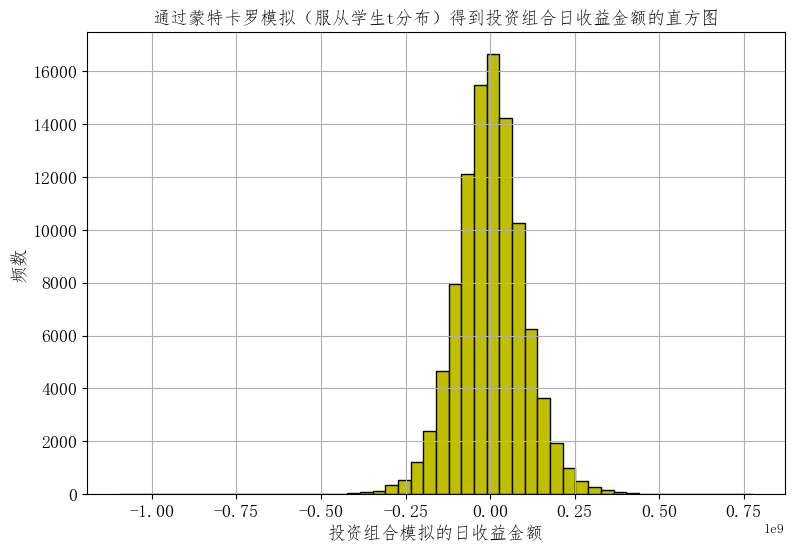

In [44]:
plt.figure(figsize=(9,6))
plt.hist(profit_port,bins=50,facecolor='y',edgecolor='k')
plt.xticks(fontsize=13)
plt.xlabel(u'投资组合模拟的日收益金额',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(u'频数',fontsize=13)
plt.title(u'通过蒙特卡罗模拟（服从学生t分布）得到投资组合日收益金额的直方图',fontsize=13)
plt.grid()
plt.show()

In [45]:
VaR95_1day_MCst=np.abs(np.percentile(a=profit_port,q=(1-X1)*100)) #持有期为1天、置信水平为95%的风险价值
VaR99_1day_MCst=np.abs(np.percentile(a=profit_port,q=(1-X2)*100)) #持有期为1天、置信水平为99%的风险价值
print('蒙特卡罗模拟法计算持有期为1天，置信水平为95%的风险价值',round(VaR95_1day_MCst,2))
print('蒙特卡罗模拟法计算持有期为1天，置信水平为99%的风险价值',round(VaR99_1day_MCst,2))

蒙特卡罗模拟法计算持有期为1天，置信水平为95%的风险价值 157196951.07
蒙特卡罗模拟法计算持有期为1天，置信水平为99%的风险价值 243279615.97


In [46]:
VaR95_10day_MCst=np.sqrt(D2)*VaR95_1day_MCst #持有期为10天、置信水平为95%的风险价值
VaR99_10day_MCst=np.sqrt(D2)*VaR99_1day_MCst #持有期为10天、置信水平为99%的风险价值
print('蒙特卡罗模拟法计算持有期为10天，置信水平为95%的风险价值',round(VaR95_10day_MCst,2))
print('蒙特卡罗模拟法计算持有期为10天，置信水平为99%的风险价值',round(VaR99_10day_MCst,2))

蒙特卡罗模拟法计算持有期为10天，置信水平为95%的风险价值 497100406.63
蒙特卡罗模拟法计算持有期为10天，置信水平为99%的风险价值 769317694.74


In [47]:
P=np.array(price.iloc[-1])
P

array([1.9980e+03, 4.4800e+00, 1.0120e+00, 1.4322e+00, 2.3097e+00])

In [48]:
epsilon_norm=npr.standard_normal(I) #从正太分布中抽取样本

In [49]:
P_new=np.zeros(shape=(I,len(R_mean)))

In [50]:
for i in range(len(R_mean)):
    P_new[:,i]=P[i]*np.exp((R_mean[i]-0.5*R_vol[i]**2)*dt+R_vol[i]*epsilon_norm*np.sqrt(dt)) #依次模拟投资组合每个资产下一个交易日的收盘价

In [51]:
profit_port_norm=(np.dot(P_new/P-1,W))*value_port

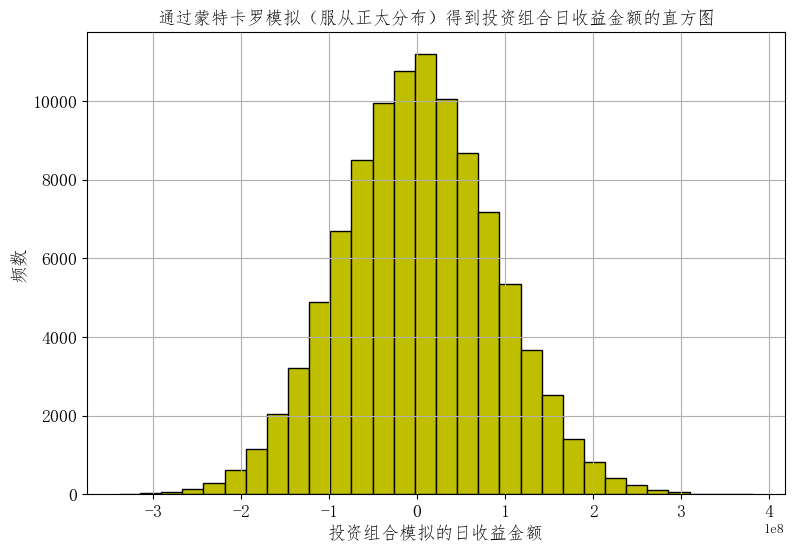

In [52]:
plt.figure(figsize=(9,6))
plt.hist(profit_port_norm,bins=30,facecolor='y',edgecolor='k')
plt.xticks(fontsize=13)
plt.xlabel(u'投资组合模拟的日收益金额',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel(u'频数',fontsize=13)
plt.title(u'通过蒙特卡罗模拟（服从正太分布）得到投资组合日收益金额的直方图',fontsize=13)
plt.grid()
plt.show()

In [53]:
VaR95_1day_MCnorm=np.abs(np.percentile(a=profit_port_norm,q=(1-X1)*100))
VaR99_1day_MCnorm=np.abs(np.percentile(a=profit_port_norm,q=(1-X2)*100))
print('蒙特卡罗模拟法（服从正太分布）计算持有期为1天、置信水平为95%的风险价值',round(VaR95_1day_MCnorm,2))
print('蒙特卡罗模拟法（服从正太分布）计算持有期为1天、置信水平为99%的风险价值',round(VaR99_1day_MCnorm,2))

蒙特卡罗模拟法（服从正太分布）计算持有期为1天、置信水平为95%的风险价值 140119799.92
蒙特卡罗模拟法（服从正太分布）计算持有期为1天、置信水平为99%的风险价值 197424100.87


In [54]:
VaR95_10day_MCnorm=np.sqrt(D2)*VaR95_1day_MCnorm
VaR99_10day_MCnorm=np.sqrt(D2)*VaR99_1day_MCnorm
print('蒙特卡罗模拟法（服从正太分布）计算持有期为10天、置信水平为95%的风险价值',round(VaR95_10day_MCnorm,2))
print('蒙特卡罗模拟法（服从正太分布）计算持有期为10天、置信水平为99%的风险价值',round(VaR99_10day_MCnorm,2))

蒙特卡罗模拟法（服从正太分布）计算持有期为10天、置信水平为95%的风险价值 443097713.03
蒙特卡罗模拟法（服从正太分布）计算持有期为10天、置信水平为99%的风险价值 624309823.77


In [55]:
VaR95_1day_VCM

90061974.2140574

In [56]:
profit_2018=profit_past.loc['2018-01-01':'2018-12-31'] #生成2018年投资组合的日收益
profit_2019=profit_past.loc['2019-01-01':'2019-12-31'] 
profit_2020=profit_past.loc['2020-01-01':'2020-12-31'] 

In [57]:
VaR_2018_neg=-VaR95_1day_VCM*np.ones_like(profit_2018) #创建2018年风险价值对应亏损的数组
VaR_2019_neg=-VaR95_1day_VCM*np.ones_like(profit_2019)
VaR_2020_neg=-VaR95_1day_VCM*np.ones_like(profit_2020)

In [58]:
VaR_2018_neg=pd.DataFrame(data=VaR_2018_neg,index=profit_2018.index) #2018年风险价值对应亏损的时间序列
VaR_2019_neg=pd.DataFrame(data=VaR_2019_neg,index=profit_2019.index)
VaR_2020_neg=pd.DataFrame(data=VaR_2020_neg,index=profit_2020.index)

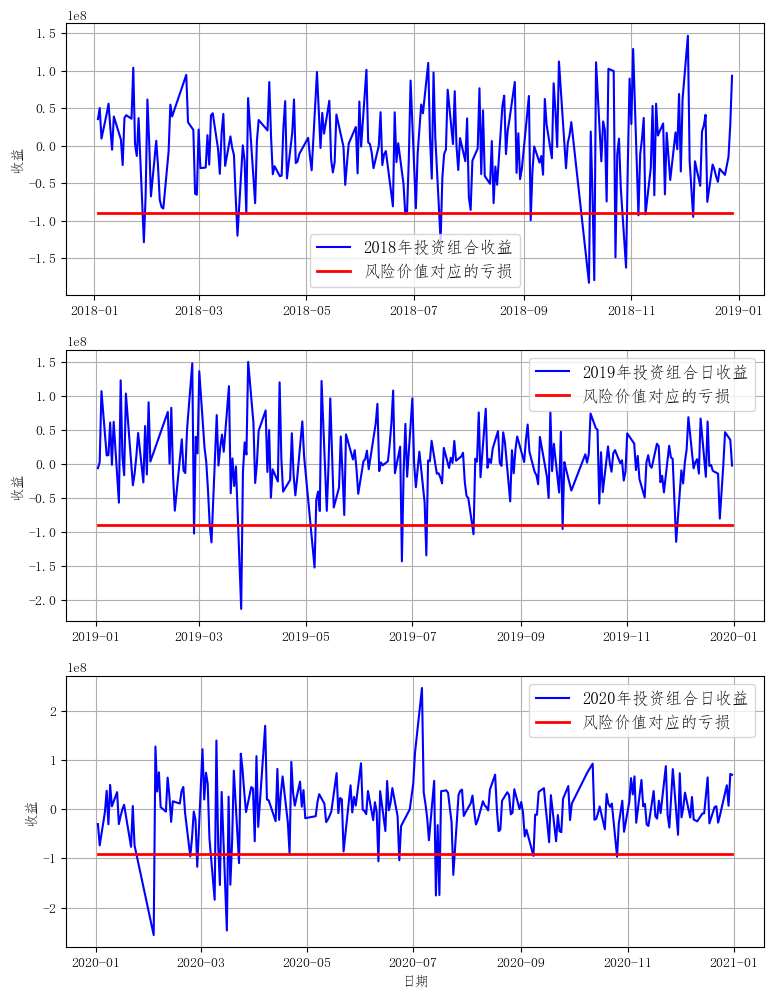

In [59]:
plt.figure(figsize=(9,12))
plt.subplot(3,1,1)
plt.plot(profit_2018,'b-',label=u'2018年投资组合收益')
plt.plot(VaR_2018_neg,'r-',label=u'风险价值对应的亏损',lw=2.0)
plt.ylabel(u'收益')
plt.legend(fontsize=12)
plt.grid()
plt.subplot(3,1,2)
plt.plot(profit_2019,'b-',label=u'2019年投资组合日收益')
plt.plot(VaR_2019_neg,'r-',label=u'风险价值对应的亏损',lw=2.0)
plt.ylabel(u'收益')
plt.legend(fontsize=12)
plt.grid()
plt.subplot(3,1,3)
plt.plot(profit_2020,'b-',label=u'2020年投资组合日收益')
plt.plot(VaR_2020_neg,'r-',label=u'风险价值对应的亏损',lw=2.0)
plt.xlabel(u'日期')
plt.ylabel(u'收益')
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [60]:
days_2018=len(profit_2018)
days_2019=len(profit_2019)
days_2020=len(profit_2020)
print('2018年的全部交易天数',days_2018)
print('2019年的全部交易天数',days_2019)
print('2020年的全部交易天数',days_2020)

2018年的全部交易天数 234
2019年的全部交易天数 236
2020年的全部交易天数 234


In [61]:
dayexcept_2018=len(profit_2018[profit_2018['投资组合的模拟收益']<-VaR95_1day_VCM])
dayexcept_2019=len(profit_2019[profit_2019['投资组合的模拟收益']<-VaR95_1day_VCM])
dayexcept_2020=len(profit_2020[profit_2020['投资组合的模拟收益']<-VaR95_1day_VCM])
print('2018年超过风险价值对应亏损的天数',dayexcept_2018)
print('2019年超过风险价值对应亏损的天数',dayexcept_2019)
print('2020年超过风险价值对应亏损的天数',dayexcept_2020)

2018年超过风险价值对应亏损的天数 12
2019年超过风险价值对应亏损的天数 10
2020年超过风险价值对应亏损的天数 15


In [62]:
ratio_2018=dayexcept_2018/days_2018
ratio_2019=dayexcept_2019/days_2019
ratio_2020=dayexcept_2020/days_2020
print('2018年超过风险价值对应亏损的天数占全年交易天数的比例',round(ratio_2018,4))
print('2019年超过风险价值对应亏损的天数占全年交易天数的比例',round(ratio_2019,4))
print('2020年超过风险价值对应亏损的天数占全年交易天数的比例',round(ratio_2020,4))

2018年超过风险价值对应亏损的天数占全年交易天数的比例 0.0513
2019年超过风险价值对应亏损的天数占全年交易天数的比例 0.0424
2020年超过风险价值对应亏损的天数占全年交易天数的比例 0.0641


In [63]:
price_stress=pd.read_excel('C:/Users/jay/Desktop/金融分析与风险管理/配套数据/第15章/投资组合配置资产压力期间的每日价格.xlsx',
                          sheet_name="Sheet1",header=0,index_col=0)

In [64]:
price_stress=price_stress.dropna()

In [65]:
price_stress.index=pd.DatetimeIndex(price_stress.index)

In [66]:
R_stress=np.log(price_stress/price_stress.shift(1))
R_stress=R_stress.dropna()

In [67]:
value_past

array([1.5e+09, 2.0e+09, 5.0e+09, 5.0e+08, 1.0e+09])

In [68]:
profit_stress=np.dot(R_stress,value_past) #压力期间投资组合的日收益金额

In [69]:
profit_stress=pd.DataFrame(data=profit_stress,index=R_stress.index,columns=['投资组合的模拟日收益'])
profit_stress

,投资组合的模拟日收益
日期,
2015-06-16,-2.787219e+07
2015-06-17,2.360349e+07
2015-06-18,-2.836678e+08
2015-06-19,-2.267675e+08
2015-06-23,2.049576e+08
...,...
2015-12-31,-1.875628e+07
2016-01-04,-2.026923e+08
2016-01-05,4.707738e+07


In [70]:
profit_stress.describe()

,投资组合的模拟日收益
count,1.390000e+02
mean,-9.082558e+06
std,1.077995e+08
min,-3.974723e+08
25%,-4.279709e+07
50%,-5.925511e+06
75%,3.900596e+07
max,2.966833e+08


In [71]:
profit_zero=np.zeros_like(profit_stress) #创建压力期间收益为0的数组
profit_zero=pd.DataFrame(data=profit_zero,index=profit_stress.index) #转换为数据框

In [72]:
profit_zero

,0
日期,
2015-06-16,0.0
2015-06-17,0.0
2015-06-18,0.0
2015-06-19,0.0
2015-06-23,0.0
...,...
2015-12-31,0.0
2016-01-04,0.0
2016-01-05,0.0


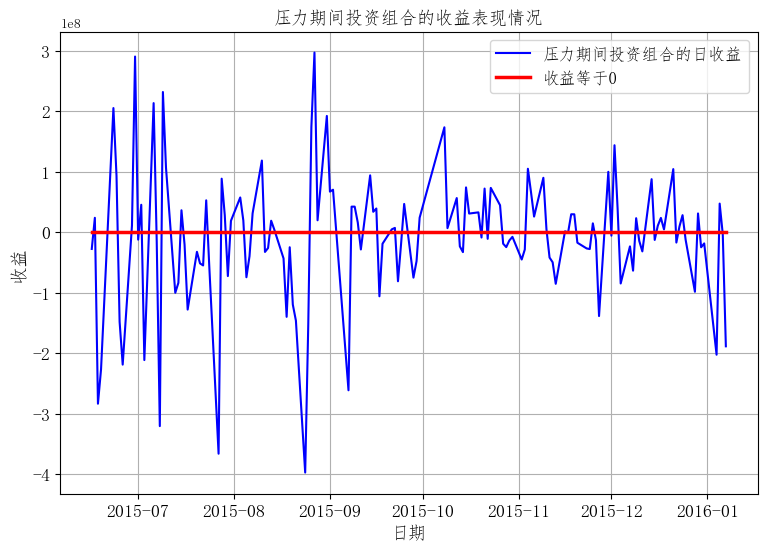

In [73]:
plt.figure(figsize=(9,6))
plt.plot(profit_stress,'b-',label=u'压力期间投资组合的日收益')
plt.plot(profit_zero,'r-',label=u'收益等于0',lw=2.5)
plt.xlabel(u'日期',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel(u'收益',fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'压力期间投资组合的收益表现情况',fontsize=13)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [74]:
SVaR95_1day=np.abs(np.percentile(a=profit_stress,q=(1-X1)*100))
SVaR99_1day=np.abs(np.percentile(a=profit_stress,q=(1-X2)*100))

In [75]:
print('持有期为1天、置信水平为95%的压力风险价值',round(SVaR95_1day,2))
print('持有期为1天、置信水平为99%的压力风险价值',round(SVaR99_1day,2))

持有期为1天、置信水平为95%的压力风险价值 212292866.22
持有期为1天、置信水平为99%的压力风险价值 348978592.42


In [76]:
SVaR95_10day=np.sqrt(D2)*SVaR95_1day
SVaR99_10day=np.sqrt(D2)*SVaR99_1day

In [77]:
print('持有期为10天、置信水平为95%的压力风险价值',round(SVaR95_10day,2))
print('持有期为10天、置信水平为99%的压力风险价值',round(SVaR99_10day,2))

持有期为10天、置信水平为95%的压力风险价值 671328988.27
持有期为10天、置信水平为99%的压力风险价值 1103567206.69


In [78]:
def CVaR(T,X,L,R,Lambda,rou):
    '''定义一个计算投资组合信用风险价值的函数
    T:代表信用风险价值的持有期，单位是年
    X:代表信用风险价值的置信水平
    L:代表投资组合的总金额
    R:代表投资组合中每个主体的违约回收率并且每个主体均相同
    Lambda:代表投资组合中每个主体连续复利的年化违约概率并且每个主体均相同
    rou:代表投资组合中任意两个主体之间的违约相关系数并且均相同'''
    from scipy.stats import norm
    from numpy import exp
    C=1-exp(-Lambda*T) #计算每个主体的累积违约概率
    V=norm.cdf((norm.ppf(C)+pow(rou,0.5)*norm.ppf(X))/pow(1-rou,0.5)) #计算阈值V(T,X)
    VaR=L*(1-R)*V #计算信用风险价值
    return VaR

In [79]:
tenor=1 #信用风险价值的持有期
prob=0.999 #信用风险价值的置信水平
par=2e11 #投资组合的总金额
recovery=0.5 #每个借款主体的违约回收率
PD=0.015 #每个借款主体的违约概率
corr=0.2 #任意两个借款主体之间的违约相关系数

In [80]:
credit_VaR=CVaR(T=tenor,X=prob,L=par,R=recovery,Lambda=PD,rou=corr)
print('持有期为1年、置信水平为99.9%的信贷资产组合信用风险价值（亿元）',round(credit_VaR/1e8,4))
print('信用风险价值占整个信贷资产组合总金额的比重',round(credit_VaR/par,6))

持有期为1年、置信水平为99.9%的信贷资产组合信用风险价值（亿元） 188.231
信用风险价值占整个信贷资产组合总金额的比重 0.094115


In [81]:
prob_list=np.linspace(0.8,0.999,200) #创建置信水平的等差数列

In [82]:
CVaR_list1=CVaR(T=tenor,X=prob_list,L=par,R=recovery,Lambda=PD,rou=corr) #计算不同置信水平的信用风险价值

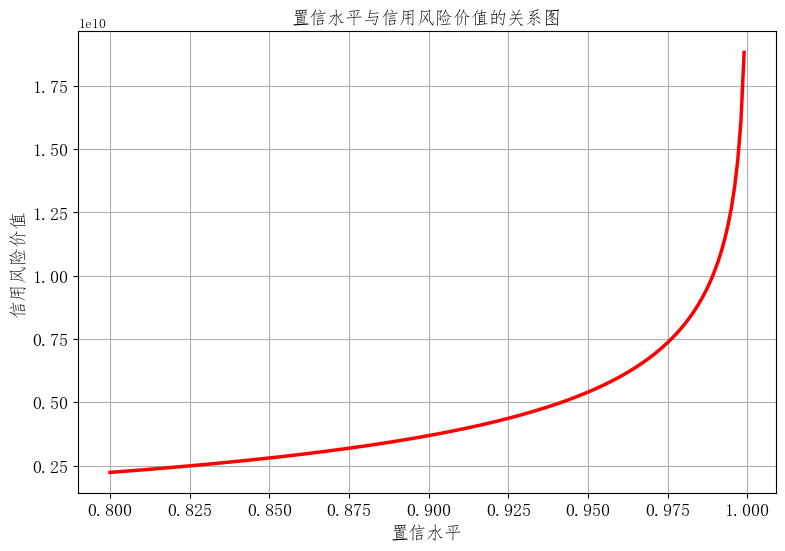

In [83]:
plt.figure(figsize=(9,6))
plt.plot(prob_list,CVaR_list1,'r-',lw=2.5)
plt.xlabel(u'置信水平',fontsize=13)
plt.ylabel(u'信用风险价值',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'置信水平与信用风险价值的关系图',fontsize=13)
plt.grid()
plt.show()

In [84]:
PD_list=np.linspace(0.005,0.05,200) #创建违约概率的等差数列

In [85]:
CVaR_list2=CVaR(T=tenor,X=prob,L=par,R=recovery,Lambda=PD_list,rou=corr)

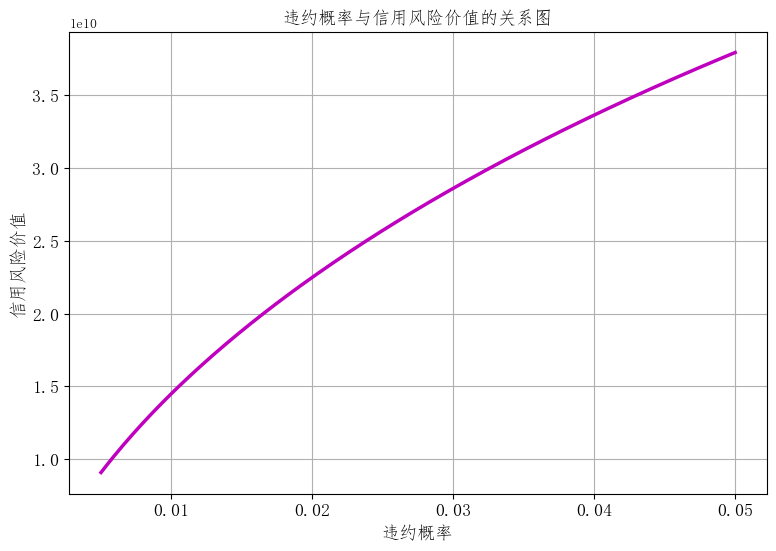

In [87]:
plt.figure(figsize=(9,6))
plt.plot(PD_list,CVaR_list2,'m-',lw=2.5)
plt.xlabel(u'违约概率',fontsize=13)
plt.ylabel(u'信用风险价值',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'违约概率与信用风险价值的关系图',fontsize=13)
plt.grid()
plt.show()

In [88]:
corr_list=np.linspace(0.1,0.6,200) #创建违约相关系数的等差数列

In [89]:
CVaR_list3=CVaR(T=tenor,X=prob,L=par,R=recovery,Lambda=PD,rou=corr_list)

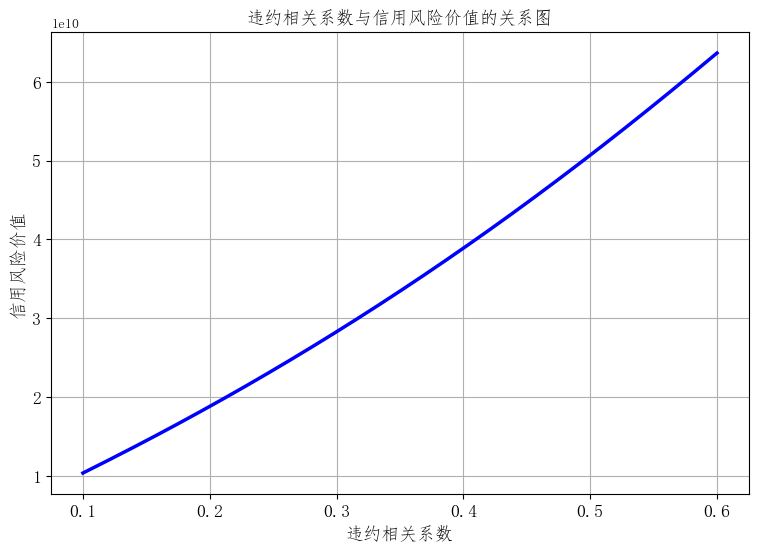

In [90]:
plt.figure(figsize=(9,6))
plt.plot(corr_list,CVaR_list3,'b-',lw=2.5)
plt.xlabel(u'违约相关系数',fontsize=13)
plt.ylabel(u'信用风险价值',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'违约相关系数与信用风险价值的关系图',fontsize=13)
plt.grid()
plt.show()